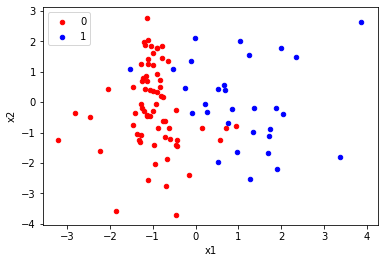

In [111]:
from sklearn.datasets import make_classification
from matplotlib import pyplot
import pandas as pd
eps = np.finfo(float).eps
from pandas import DataFrame

X, y = make_classification(n_samples = 100, n_features=2, n_redundant=0, n_informative=2, random_state = 0, weights=[0.7, 0.3])
# scatter plot, dots colored by class value
d = {'x1':X[:,0], 'x2':X[:,1], 'y':y}
df = DataFrame(data = d)
colors = {0:'red', 1:'blue'}
fig, ax = pyplot.subplots()
grouped = df.groupby('y')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x1', y='x2', label=key, color=colors[key])
pyplot.show()

In [116]:
def training_error(data, split, feature):
    d1 = data[data[feature] > split]
    d2 = data[data[feature] <= split]
    v1 = len(d1[d1['y'] == 0])/(len(d1['y'])+eps)
    v2 = len(d2[d2['y'] == 0])/(len(d2['y'])+eps)
    if v1>0.5:
        a = (1-v1)*0.3
    else:
        a = v1*0.7
    if v2>0.5:
        b = (1-v2)*0.3
    else:
        b = v2*0.7
    return a+b

In [117]:
training_error(df, 0, 'x1')

0.125

In [118]:
l = []
for i in range(-3, 4):
    l.append([training_error(df, i, 'x1')])
    print(l)

[[0.09090909090909097]]
[[0.09090909090909097], [0.09473684210526315]]
[[0.09090909090909097], [0.09473684210526315], [0.1424175824175824]]
[[0.09090909090909097], [0.09473684210526315], [0.1424175824175824], [0.125]]
[[0.09090909090909097], [0.09473684210526315], [0.1424175824175824], [0.125], [0.05294117647058825]]
[[0.09090909090909097], [0.09473684210526315], [0.1424175824175824], [0.125], [0.05294117647058825], [0.08125]]
[[0.09090909090909097], [0.09473684210526315], [0.1424175824175824], [0.125], [0.05294117647058825], [0.08125], [0.0857142857142857]]


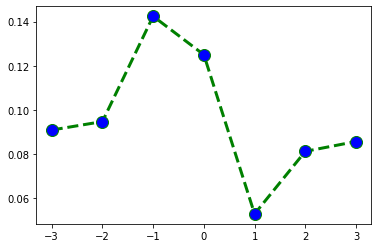

In [119]:
pyplot.plot(range(-3, 4), l, color='green', linestyle='dashed', linewidth = 3, 
         marker='o', markerfacecolor='blue', markersize=12) 


In [120]:
l1 = []
for i in range(-3, 4):
    l1.append([training_error(df, i, 'x2')])
    print(l1)

[[0.09183673469387756]]
[[0.09183673469387756], [0.16630434782608694]]
[[0.09183673469387756], [0.16630434782608694], [0.1722983257229833]]
[[0.09183673469387756], [0.16630434782608694], [0.1722983257229833], [0.18017135862913097]]
[[0.09183673469387756], [0.16630434782608694], [0.1722983257229833], [0.18017135862913097], [0.19539473684210523]]
[[0.09183673469387756], [0.16630434782608694], [0.1722983257229833], [0.18017135862913097], [0.19539473684210523], [0.3652631578947368]]
[[0.09183673469387756], [0.16630434782608694], [0.1722983257229833], [0.18017135862913097], [0.19539473684210523], [0.3652631578947368], [0.09000000000000001]]


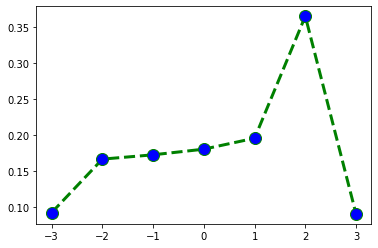

In [121]:
pyplot.plot(range(-3, 4), l1, color='green', linestyle='dashed', linewidth = 3, 
         marker='o', markerfacecolor='blue', markersize=12) 
